In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('data1.xls', index_col=0, parse_dates = True)
df.head(5)
#각 column이 각 개별적인 금융자산을 의미
#총 50개의 자산의 월별 수익률의 분산을 나타낸 표

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,-7.092,-1.773,-5.882000,-7.655000,3.846,-6.335,-10.390,-20.388,-6.329,0.000,...,-7.865,-12.000,-7.865,-14.721,-4.762,-16.204,4.250,-1.351,-10.667,-1.600
1990-02-01,1.878,0.722,4.688000,-4.663000,0.000,7.246,7.246,3.659,0.000,0.204,...,26.829,4.464,26.829,3.571,3.533,3.546,10.843,-0.438,4.806,0.781
1990-03-01,3.817,15.484,1.493000,-3.370000,3.704,8.597,2.649,4.047,-1.361,4.167,...,3.846,-8.547,3.846,12.069,-0.540,3.196,0.000,0.000,6.475,1.626
1990-04-01,-9.559,1.558,-2.941000,-11.429000,-14.286,-12.500,-3.097,-6.250,27.586,-4.000,...,-12.500,-5.607,-12.500,-4.615,0.000,-2.097,-10.435,-4.225,-3.378,-0.800
1990-05-01,1.626,0.000,18.181999,18.063999,20.833,12.857,7.251,12.727,11.351,-3.958,...,-2.128,19.208,-2.128,-15.323,3.456,6.865,4.878,-0.471,12.546,4.806


### (a) 

Form the equal-weighted portfolios using the first 5 stock, first 10 stock, first 25 stocks and all 50 stocks (or you can go through from 1 to 50 if you prefer). Plot the portfolio variance as a function of the number of stocks in each portfolio.

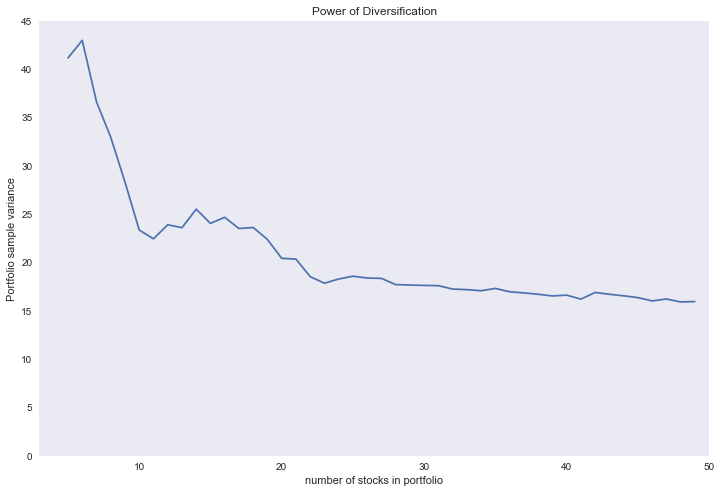

In [6]:
#포트폴리오에 담겨있는 자산의 개수를 늘려가며 전체적인 자산의 분산이 어떻게 되냐

start = 5
end = df.shape[1]

storage1 = []

for i in range(start, end): #5개에서 50개까지
    
    x = df.iloc[:,:i]
    
    x_mean = x.mean() #각 자산별 수익률의 분산을 평균
    x_cov = x.cov()   #분산의 평균과 분산의 공분산..?
    w = np.asarray([1/i]*i) # 1/n만큼을 n개(즉 n=5면 0.2를 5개)
    
    pf_return = np.sum(x_mean*w) #분산의 가중평균 
    pf_var = np.dot(w, np.dot(x_cov,w)) #행렬곱 : (1*i)(i*i)(i*1)
    #결국 1/n * cov(ri,rj)의 시그마(총합)가 남게 됨
   
    stats = (pf_return, pf_var)
    storage1.append(stats)

    
storage1 = np.array(storage1)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(range(start,end), storage1[:,1]) #??

plt.xlabel('number of stocks in portfolio')
plt.ylabel('Portfolio sample variance')
plt.title('Power of Diversification')

plt.grid() #격자 설정
plt.axis([3, 50, 0, 45]) #축 범위 지정하기
#plt.axis((xmin, xmax, ymin, ymax))
plt.savefig("diversification.png", dpi=1200) #그림을 (해당) 경로에 지정하기
plt.show(block=False) #그림 그려주기
# block : figures are shown and this function immediately returns.(중요한 건 아닌 거 같음)

In [7]:
x = df.iloc[:,:5]
x

,var1,var2,var3,var4,var5
date,,,,,
1990-01-01,-7.092,-1.773,-5.882000,-7.655000,3.846000
1990-02-01,1.878,0.722,4.688000,-4.663000,0.000000
1990-03-01,3.817,15.484,1.493000,-3.370000,3.704000
1990-04-01,-9.559,1.558,-2.941000,-11.429000,-14.286000
1990-05-01,1.626,0.000,18.181999,18.063999,20.833000
...,...,...,...,...,...
1999-08-01,-2.288,-10.286,-0.610000,-1.698000,-13.531000
1999-09-01,4.408,-9.554,3.476000,-7.328000,-25.572001
1999-10-01,-2.423,-5.634,-39.327999,19.113001,-50.769001


In [8]:
x.mean()

var1    1.371358
var2   -0.591725
var3    1.086725
var4    1.622258
var5    2.635675
dtype: float64

In [9]:
x.cov()

,var1,var2,var3,var4,var5
var1,49.826473,-8.497101,5.865721,15.779632,1.447719
var2,-8.497101,111.861221,1.863721,12.712699,31.354339
var3,5.865721,1.863721,128.096872,9.432438,43.942825
var4,15.779632,12.712699,9.432438,101.546267,33.826377
var5,1.447719,31.354339,43.942825,33.826377,342.333367


In [13]:
np.asarray([1/5]*5)

array([0.2, 0.2, 0.2, 0.2, 0.2])

### (b) 
Plot the variance, average variance, and average covariance of the equal-weighted portfolio as a function of the number of stocks.

In [5]:
x_diag = np.diag(x_cov)
x_diag #행렬의 대각선에 있는 값들만(i와 j가 같은 값)

array([ 49.82647333, 111.86122121, 128.09687157, 101.54626679,
       342.33336714, 141.70184285,  61.69520341,  60.49592144,
        64.24880227,   6.16458096,  66.00324844, 165.81518651,
        78.49524112, 234.72589941,  36.60075227, 123.60448934,
        42.92139593, 135.8074738 ,  39.27992275,   7.92360777,
        71.75426004,  10.48736025,  35.59092817, 102.719805  ,
        72.20523   ,  81.46658587,  53.00425353,  21.10935835,
       134.788383  , 148.69019822,  54.42312661,  68.46637352,
        62.92057048, 102.43192849,  94.41065449,  96.84960643,
        95.91085616,  79.94816538,  48.69733063, 760.72567778,
       168.57968234, 324.92288981, 168.57968234, 162.16438971,
        57.91131964,  37.93942736, 155.35510755,  32.63703524,
        52.05609978])

In [6]:
avg_var = (1/i)*np.mean(x_diag)
avg_var

2.230693067241387

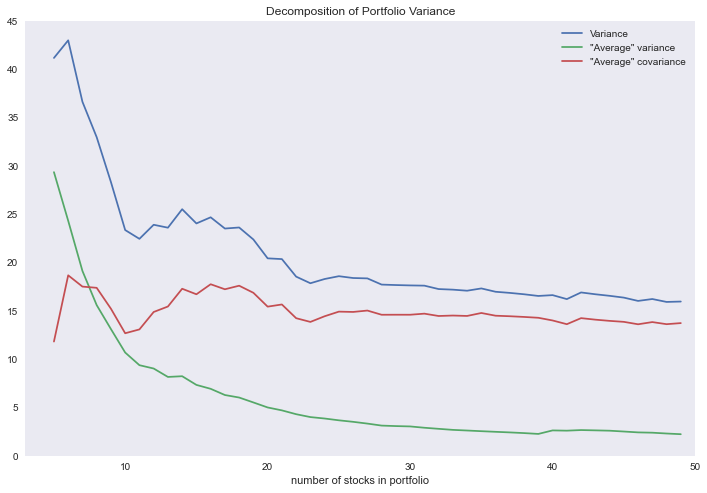

In [7]:
storage2 = []

for i in range(start, end):
    
    x = df.iloc[:,:i]

    x_cov = x.cov()
    x_diag = np.diag(x_cov) #특잇값 분해 : 대각선의 값만 불러옴
    avg_var = (1/i)*np.mean(x_diag) #??

    x_offsum = np.sum(np.sum(x_cov)) - np.sum(x_diag)
    avg_covar = (1/(i**2))*x_offsum
   
    stats = (avg_var, avg_covar)
    storage2.append(stats)

    
storage2 = np.array(storage2)
store_all = np.concatenate((storage1, storage2), axis=1)
                           
labels = ['Variance', '"Average" variance', '"Average" covariance']
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(range(start,end), store_all[:,1:4])
plt.xlabel('number of stocks in portfolio')
plt.ylabel('')
plt.title('Decomposition of Portfolio Variance')
plt.grid()
plt.axis([3, 50, 0, 45])
plt.legend(labels)
plt.savefig("decomposition.png", dpi=1200)
plt.show()

In [9]:
storage2 = np.array(storage2)
storage2

array([[29.346568  , 11.81826955],
       [24.31572341, 18.67077064],
       [19.1236989 , 17.50489443],
       [15.58683075, 17.37773989],
       [13.10871568, 15.21360832],
       [10.67970551, 12.67568318],
       [ 9.37168429, 13.07399931],
       [ 9.0263124 , 14.87613748],
       [ 8.15552797, 15.44328964],
       [ 8.2296435 , 17.28189384],
       [ 7.33160391, 16.7080278 ],
       [ 6.92662253, 17.74782855],
       [ 6.28421026, 17.22692506],
       [ 6.02451925, 17.59601693],
       [ 5.5158564 , 16.86175184],
       [ 4.99786942, 15.42957164],
       [ 4.69592297, 15.65440443],
       [ 4.3003913 , 14.23505431],
       [ 4.00185315, 13.84873237],
       [ 3.85364604, 14.43533712],
       [ 3.66704856, 14.91392359],
       [ 3.51090523, 14.88065182],
       [ 3.3283624 , 15.02513671],
       [ 3.12179279, 14.59023192],
       [ 3.0704803 , 14.59364327],
       [ 3.03440459, 14.59208777],
       [ 2.89842587, 14.70400378],
       [ 2.78696644, 14.46200104],
       [ 2.67839688,

In [11]:
store_all = np.concatenate((storage1, storage2), axis=1)
store_all

array([[ 1.22485832, 41.16483755, 29.346568  , 11.81826955],
       [ 1.23889443, 42.98649405, 24.31572341, 18.67077064],
       [ 0.97244046, 36.62859333, 19.1236989 , 17.50489443],
       [ 0.99721353, 32.96457063, 15.58683075, 17.37773989],
       [ 1.0595574 , 28.32232399, 13.10871568, 15.21360832],
       [ 1.00881582, 23.35538869, 10.67970551, 12.67568318],
       [ 1.09626135, 22.44568361,  9.37168429, 13.07399931],
       [ 1.1652618 , 23.90244988,  9.0263124 , 14.87613748],
       [ 1.11937627, 23.59881761,  8.15552797, 15.44328964],
       [ 1.05200952, 25.51153734,  8.2296435 , 17.28189384],
       [ 1.13403333, 24.03963171,  7.33160391, 16.7080278 ],
       [ 1.20164114, 24.67445108,  6.92662253, 17.74782855],
       [ 1.19622695, 23.51113532,  6.28421026, 17.22692506],
       [ 1.11136944, 23.62053618,  6.02451925, 17.59601693],
       [ 1.15234868, 22.37760824,  5.5158564 , 16.86175184],
       [ 1.1178575 , 20.42744106,  4.99786942, 15.42957164],
       [ 1.11572262, 20.

### (C)
- mean variance frontier

solving model
- (1) analytical solution :손으로 풀어서 최적화를 구하는..
- (2) numerical solution : 


In [15]:
# Two risky assets

def get_weights_variance(mu, e1, e2, sig11, sig12, sig22):
    w1 = (mu - e2) / (e1 - e2)
    w2 = 1 - w1
    var = w1**2*sig11**2 + 2*w1*w2*sig12 + w2**2*sig22**2
    std = np.sqrt(var) #루트
    
    return w1,w2,std,var

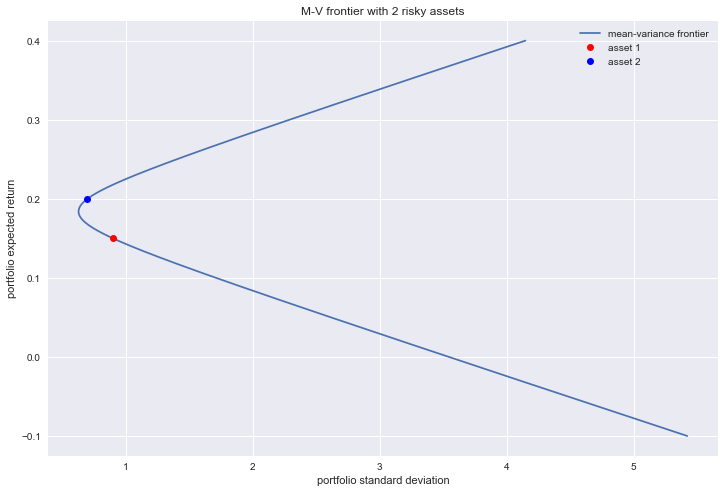

In [16]:
e1 = 0.15
e2 = 0.20
sig11 = 0.9
sig12 = 0.2
sig22 = 0.7

var_list = [] #포트폴리오의 분산을 저장하는 list

for x in np.linspace(-0.1,0.4,10000) : #기대수익률 -0.1 ~ 0.4까지 만개의 요소를 만듦
    w1,w2,std,var = get_weights_variance(x, e1, e2, sig11, sig12, sig22)
    m = w1*e1 + w2*e2
    var_list.append(std)
    
x = np.linspace(-0.1,0.4,10000)
y = var_list #나중에 다 모아서 그림 그리기

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.plot(y,x, label = 'mean-variance frontier')
plt.plot(sig11, e1, 'ro', label = 'asset 1') #자산1, 'ro'는 빨간색 볼드한 점을 의미하는 듯
plt.plot(sig22, e2, 'bo', label = 'asset 2')

plt.title('M-V frontier with 2 risky assets')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.legend() #범례 입력
plt.show()

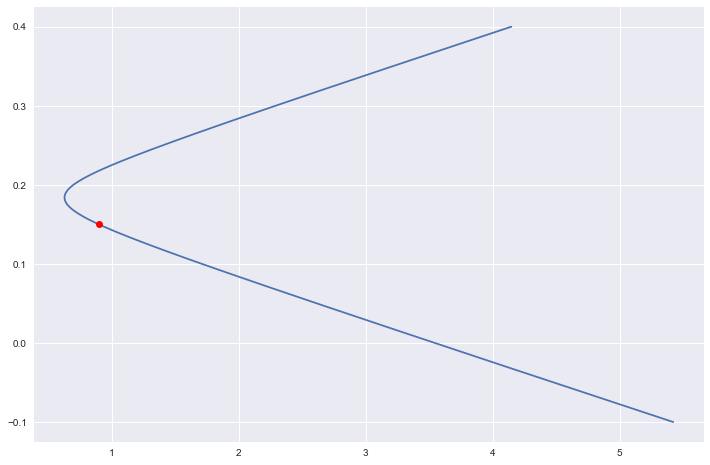

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(y,x, label = 'mean-variance frontier')
plt.plot(sig11, e1, 'ro', label = 'asset 1')

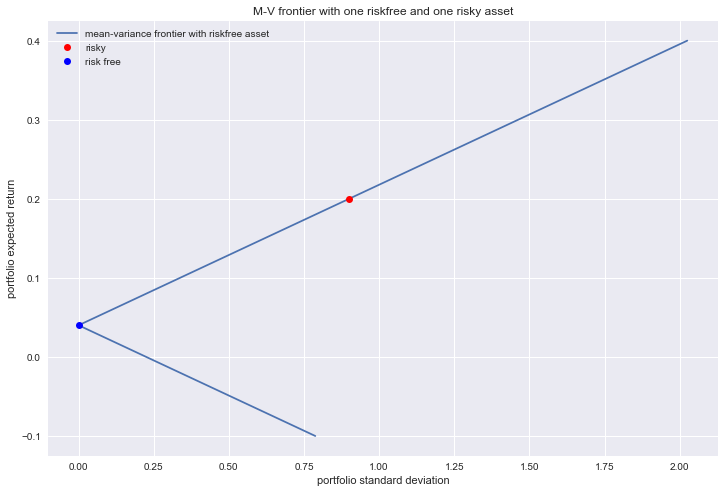

In [24]:
# one risk free, one risky

rf = 0.04
e1 = 0.2
sigma = 0.9

def get_weights_variance_rf(mu, e1, rf, sigma) :
    w1 = (mu - rf) / (e1 - rf)
    w2 = 1 - w1
    var = w1**2*sigma**2
    std = np.sqrt(var)
    return w1,w2,std,var

var_list = []
for x in np.linspace(-0.1,0.4,10000) :
    std = get_weights_variance_rf(x, e1, rf, sigma)[2]
    var_list.append(std)
    
x = np.linspace(-0.1,0.4,10000)
y = var_list

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.plot(y,x, label = 'mean-variance frontier with riskfree asset')
plt.plot(sigma, e1, 'ro', label = 'risky')
plt.plot(0, rf, 'bo', label = 'risk free')

plt.title('M-V frontier with one riskfree and one risky asset')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.legend()
plt.show()

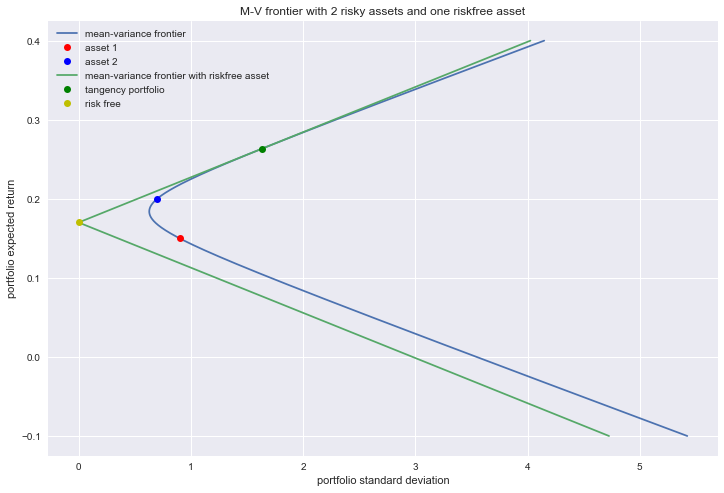

In [25]:
e1 = 0.15
e2 = 0.20
sig11 = 0.9
sig12 = 0.2
sig22 = 0.7
rf = 0.17

def get_weights_variance(mu, e1, e2, sig11, sig12, sig22):
    w1 = (mu - e2) / (e1 - e2)
    w2 = 1 - w1
    var = w1**2*sig11**2 + 2*w1*w2*sig12 + w2**2*sig22**2
    std = np.sqrt(var)
    return w1,w2,std,var

var_list = []
store_m, store_std, s_ratio = 0, 0, 0
for x in np.linspace(-0.1,0.4,10000) :
    w1,w2,std,var = get_weights_variance(x, e1, e2, sig11, sig12, sig22)
    m = w1*e1 + w2*e2
    var_list.append(std)
    
    if (m-rf)/std > s_ratio : #sharp ratio가 계속 변화하는데 이렇게 하면 가장 높은 sharp ratio 찾을 수 있음
        store_m = m
        store_std = std
        s_ratio = (m-rf)/std #sharp ratio
    
var_list1 = []
for x in np.linspace(-0.1,0.4,10000) :
    std1 = get_weights_variance_rf(x, store_m, rf, store_std)[2]
    #가장 s_ratio가 높은 초록색 점과 rf를 있는 직선을 그린다
    var_list1.append(std1)
    
x = np.linspace(-0.1,0.4,10000)
y = var_list
y1 = var_list1

plt.style.use('seaborn')
plt.figure(figsize=(12,8))

plt.plot(y,x, label = 'mean-variance frontier')
plt.plot(sig11, e1, 'ro', label = 'asset 1')
plt.plot(sig22, e2, 'bo', label = 'asset 2')
plt.plot(y1,x, label = 'mean-variance frontier with riskfree asset')
plt.plot(store_std, store_m, 'go', label = 'tangency portfolio')
plt.plot(0, rf, 'yo', label = 'risk free')

plt.title('M-V frontier with 2 risky assets and one riskfree asset')
plt.xlabel('portfolio standard deviation')
plt.ylabel('portfolio expected return')
plt.legend()
plt.show()

### Mean-Variance Frontier with financial data

In [9]:
#실제적인 금융데이터를 받아와서 코드 짠 것

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web

data = pd.DataFrame() 
#삼성전자, sk하이닉스, 카카오, 네이버
for code in ['005930', '000660', '035720', '035420'] : 
    data = pd.concat([data,web.DataReader(code, 'naver', start='2019-01-01', end='2020-01-01')['Close'].apply(int)], axis=1)
    #해당 코드를 네이버 증권에서 불러오라, 종가로, int형으로
    #데이터 프레임 합치기
    #axis=1 오른쪽으로 열 추가하는 방식 / axis = 0 행추가 방식

data.columns = ['se', 'skh', 'kk','nvr']
noa = len(data.columns) #4개
data.head()

,se,skh,kk,nvr
2019-01-02 00:00:00,38750,60600,20473,118000
2019-01-03 00:00:00,37600,57700,20573,122000
2019-01-04 00:00:00,37450,58300,20774,125500
2019-01-07 00:00:00,38750,58700,20673,131500
2019-01-08 00:00:00,38100,59200,20051,130000


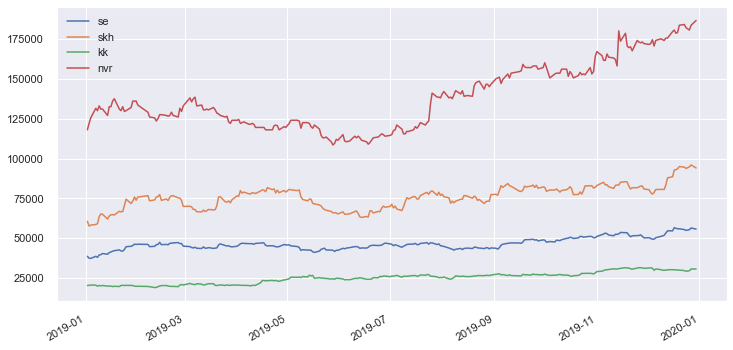

In [14]:
data.plot(figsize=(12,6))
#각 주식 종목의 움직임

In [28]:
data.iloc[0]

se      38750
skh     60600
kk      20473
nvr    118000
Name: 2019-01-02 00:00:00, dtype: int64

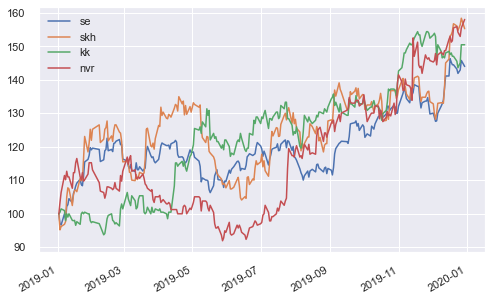

In [16]:
# Normalized Plot : 표준화해서 본 것(비교를 위해)

(data / data.iloc[0] * 100).plot(figsize=(8, 5))

### Random Portfolio (random weights)

- numerical solution : 가중치 4개(w1, w2, w3, w4)의 조합을 random하게 바꿔가면서 모든 조합을 다 찍어놓고 그 중에서 가장 좋은 경우를 뽑는 방법

In [24]:
weights = np.random.random(noa) #4개의 난수 생성
weights /= sum(weights) #w1, w2, w3, w4 생성
weights

array([0.11955129, 0.18696333, 0.21160928, 0.4818761 ])

In [28]:
weights = [0.6]
w = np.random.random(noa)
w /= sum(w)
w = list(w*0.4)
#weights.append(w[0])
#weights.append(w[1])
#weights.append(w[2])
#weights.append(w[3])
weights = weights + w
weights

[0.6,
 0.12880311538440387,
 0.12288219664759195,
 0.14226348751655166,
 0.0060512004514525495]

In [21]:
w = random.random(noa)

NameError: name 'random' is not defined

In [31]:
data.pct_change().dropna()

,se,skh,kk,nvr
2019-01-03,-0.029677,-0.047855,0.004884,0.033898
2019-01-04,-0.003989,0.010399,0.009770,0.028689
2019-01-07,0.034713,0.006861,-0.004862,0.047809
2019-01-08,-0.016774,0.008518,-0.030088,-0.011407
2019-01-09,0.039370,0.074324,0.021046,0.023077
...,...,...,...,...
2019-12-23,-0.008929,-0.004211,-0.009998,0.002725
2019-12-24,-0.009009,-0.008457,-0.013454,-0.010870
2019-12-26,0.007273,0.010661,0.010236,-0.008242
2019-12-27,0.019856,0.012658,0.037164,0.016620


In [79]:
# get returns
ret = data.pct_change().dropna() #퍼센트 변화율

# use sample mean and variance as estimates of expected portfolio return and variance

port_mean = np.sum(weights * ret.mean() *250) # sample mean
port_var = np.dot(weights.T, np.dot(ret.cov()*250, weights)) #sample variance 
#행렬 곱할 때 순서는 상관없나?
port_std = np.sqrt(port_var) # sample standard deviation


In [34]:
port_mean

0.44167814855775495

In [80]:
port_var

0.03852438462170561

In [67]:
np.dot(ret.cov()*250, weights)

array([0.02934547, 0.04800264, 0.03077368, 0.04225613])

In [65]:
weights.T.shape

(4,)

In [64]:
weights.shape

(4,)

### Now, we simulate $\left( \hat{\mu}, \hat{\sum} \right)$ with various weights

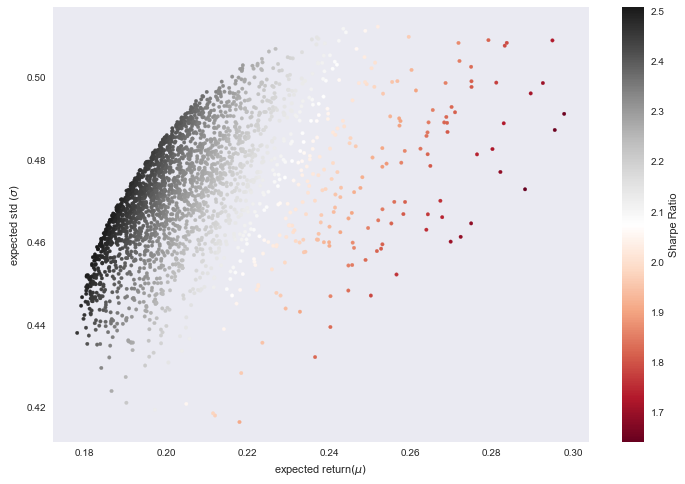

In [95]:
port_rets = []
port_std = []

def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *250)
    port_var = np.dot(weight.T, np.dot(ret.cov()*250, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

for w in range(2500): 
    weight = np.random.random(noa)
    weight /= np.sum(weight) #2500번 서로 다른 w1~w4의 조합을 생성하기
    
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig) #각각의 mean과 std를 append

sr = np.array(port_rets)/np.array(port_std)
    
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.scatter(port_std, port_rets, c=sr, marker='.', cmap='RdGy')
#plt.scatter(port_std, port_rets, c=sr, marker='.',  cmap='RdGy')
# c=sr 점의 색깔 변화
# cmap='RdGy' 빨간색 ~ 회색 색을 지정
# marker='.' 작은 점으로 찍게 해줌

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('expected return$(μ)$')
plt.ylabel('expected std $(σ)$');
plt.grid()

#각각의 점이 가중치를 뽑아내서 개별적인 각 포트폴리오의 평균과 분산 조합
#오른쪽 축 : 각각의 지점별 sharp ratio(??)
#mean variance frontier : 여기서 가장 높은 것들의 점을 이은 것

In [50]:
def statistics(weights, rf=0):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(ret.mean() * weights) * 252 - rf
    pvol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights))) #행렬곱
    return np.array([pret, pvol, pret / pvol])

In [48]:
ret.cov()

,se,skh,kk,nvr
se,0.000212,0.000226,0.000032,0.000037
skh,0.000226,0.000495,0.000030,0.000043
kk,0.000032,0.000030,0.000321,0.000091
nvr,0.000037,0.000043,0.000091,0.000427


In [44]:
np.dot(ret.cov() * 252, weights)

array([0.03269591, 0.03740934, 0.03168658, 0.03072511])

In [53]:
weights.T

array([0.49226865, 0.04248801, 0.28824738, 0.17699597])

In [56]:
weights

array([0.49226865, 0.04248801, 0.28824738, 0.17699597])

## Optimization 1: weights maximizing the Sharpe ratio
\begin{align*}
max_{w_i's} (sr)\equiv \frac{r_p-r_f}{\sigma_p} \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1
\end{align*}

Let $r$

최적 포폴을 구하는 여러가지 방법 중 1 sharp ratio를 최적화하는 가중치 조합

In [43]:
import scipy.optimize as opt

def min_func_sharpe(weights, rf=0):
    return -statistics(weights, rf)[2] #index=2라는 건 sharp ratio를 돌려주라는 거(-붙였으니 최댓값)

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) #제약식 , w의 합이 1과 같아야 한다
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,] #0.25

opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

#두번째 값 : Initial guess. Array of real elements of size (n,), where ‘n’ is the number of independent variables.
#bounds = Sequence of (min, max) pairs for each element in x. 

opts

     fun: -2.518584891870693
     jac: array([-1.17033720e-04, -3.48389149e-05,  1.03354454e-04,  5.45084476e-05])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.35041199, 0.10066938, 0.2992044 , 0.24971424])

In [98]:
(opts['x'])[1]

0.10066937953702859

In [82]:
tuple((0, 1) for x in range(noa))

((0, 1), (0, 1), (0, 1), (0, 1))

In [23]:
opts.x.round(3) #각각의 weight들

array([0.35 , 0.101, 0.299, 0.25 ])

In [24]:
statistics(opts['x']).round(3) #해당 weight를 넣은 평균, 분산, sharp ratio

array([0.461, 0.183, 2.519])

## Optimization 2: weights minimizing variance (volatility)
\begin{align*}
min_{w_i's} \sigma_p^2 \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1
\end{align*}

minimizing variance : 변동성이 가장 낮은 포트폴리오

In [83]:
def min_func_volatility(weights):
    return statistics(weights)[1] **2 #variance를 최소화

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [84]:
optv = opt.minimize(min_func_volatility, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [85]:
optv.x.round(3)

array([0.522, 0.   , 0.288, 0.19 ])

In [86]:
statistics(optv['x']).round(3)

array([0.442, 0.179, 2.473])

## Optimization 3: Optimal Portfolio Frontier
\begin{align*}
min_{w_i's} \sigma_p^2 \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1,   r_p = \bar{r}
\end{align*}

무위험 자산까지 있을 때 포트폴리오 조합을 구성하는 방법

In [100]:
def min_func_port(weights):
    return statistics(weights)[1] #표준편차를 return

cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [93]:
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [91]:
tvols

array([0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251, 0.2309251,
       0.2309251, 0.2309251])

In [89]:
tret

0.25

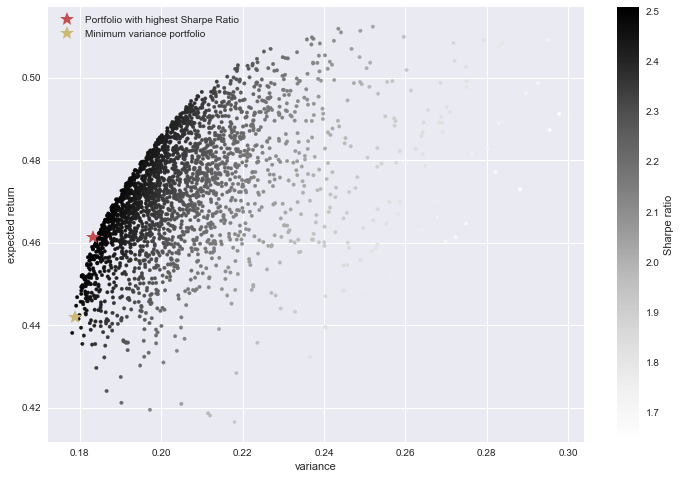

In [101]:
plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
            # random portfolio composition
    
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0, label = 'Minimum variance portfolio')
            # minimum variance portfolio  
plt.legend()
plt.grid(True)
plt.xlabel('variance')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

#앞에서와 같은 점들을 다 찍어놓고 각각의 점들이 어디있는지 보여주기 위한 코드
#다양한 포폴 조합 중 sharp ratio가 가장 높은 점/최소분산 포폴

### Efficient Frontier with riskfree asset (CML, CAL)
- Let $r_f = 0.02$

In [102]:
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
var_list = [x*slope + rf for x in np.linspace(0.16,0.30,2500)]

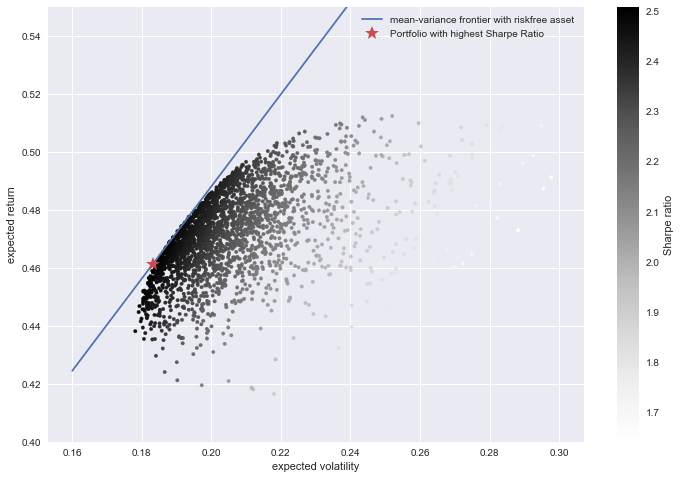

In [103]:
x =  np.linspace(0.16,0.30,2500)
y = var_list

plt.figure(figsize=(12, 8))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
plt.plot(x,y, label = 'mean-variance frontier with riskfree asset')
            # random portfolio composition  
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
            # portfolio with highest Sharpe ratio
plt.ylim((0.4, 0.55))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')                    